# This is based on hometheaterforum.com

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import simple_request as sr
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def fetch_articles(thread_name, movie_title, movie_director, max_pages=20, verbose=True):
    sent_analyzer = SentimentIntensityAnalyzer()
    forum_url = 'https://www.hometheaterforum.com/community/threads/'
    thread_url = forum_url + thread_name
    movie_articles = []
    for page_no in range(1, max_pages+1):
        if page_no > 1:
            url = '{}/page-{}'.format(thread_url, page_no)
        else:
            url = thread_url
        if verbose:
            print('Fetching:', url)
        raw_content = sr.simple_get(url)
        if not raw_content:
            continue
        thread = BeautifulSoup(raw_content, 'html.parser')
        articles = thread.find_all('div', class_='bbWrapper')
        for a in articles:
            try:
                article_text = a.text
                article_text = article_text.replace(a.blockquote.text, '')
            except:
                continue
            finally:
                scores = sent_analyzer.polarity_scores(article_text)
                art_dict = {}
                art_dict['movie_title'] = movie_title
                art_dict['movie_director'] = movie_director
                art_dict['article_text'] = article_text
                art_dict['sent_neg'] = scores['neg']
                art_dict['sent_neu'] = scores['neu']
                art_dict['sent_pos'] = scores['pos']
                art_dict['sent_compound'] = scores['compound']
                movie_articles.append(art_dict)
        next_link = thread.find('a', class_='pageNav-jump--next')
        if not next_link:
            break;
    file_path = './data/{}.json'.format(thread_name)
    with open(file_path, 'w') as fp:
        fp.write(json.dumps(movie_articles))
    if verbose:
        print('Finished.')
    return

def build_dataframe(movies):
    file_path = './data/{}.json'.format(movies[0]['thread'])
    df = pd.read_json(file_path)
    for m in movies[1:]:
        file_path = './data/{}.json'.format(m['thread'])
        df_temp = pd.read_json(file_path)
        df = pd.concat([df, df_temp], axis=0)
        df = df.reset_index(drop=True)
    return df

# Science Fiction Movies

In [3]:
science_fiction_movies = [
    {'thread':'justice-league-2017.348140', 'title':'Justice League', 'director':'Zack Snyder'},
    {'thread':'dune-2020.290560', 'title':'Dune', 'director':'Denis Villeneuve'},
    {'thread':'star-wars-the-rise-of-skywalker-2019-non-spoilers.356334', 'title':'Star Wars: The Rise of Skywalker', 'director':'J.J. Abrams'},
    {'thread':'black-widow-2020.355737', 'title':'Black Widow', 'director':'Cate Shortland'},
    {'thread':'x-men-dark-phoenix-june-7-2019.352356', 'title':'X-Men: Dark Phoenix', 'director':'Simon Kinberg'},
    {'thread':'alita-battle-angel-james-cameron.355278', 'title':'Alita: Battle Angel', 'director':'Robert Rodriguez'},
    {'thread':'terminator-dark-fate-11-01-19.345415', 'title':'Terminator: Dark Fate', 'director':'Tim Miller'},
    {'thread':'avengers-endgame-spoilers-allowed-thread.361784', 'title':'Avengers: Endgame', 'director':'Joe Russo, Anthony Russo'},
    {'thread':'godzilla-king-of-the-monsters-may-31-2019.331684', 'title':'Godzilla: King of the Monsters', 'director':'Michael Dougherty'},
    {'thread':'gemini-man-2019.361753', 'title':'Gemini Man', 'director':'Ang Lee'},
    {'thread':'star-wars-the-last-jedi-discussion-thread-warning-spoilers.355354', 'title':'Star Wars: The Last Jedi', 'director':'Rian Johnson'},
    {'thread':'rogue-one-a-star-wars-story-2016.345054', 'title':'Rogue One: A Star Wars Story', 'director':'Gareth Edwards'},
    {'thread':'solo-a-star-wars-story-2018.357757', 'title':'Solo: A Star Wars Story', 'director':'Ron Howard'},
    {'thread':'star-trek-the-motion-picture-1979.288027', 'title':'Star Trek: The Motion Picture', 'director':'Robert Wise'},
    {'thread':'a-quiet-place-2018.356552', 'title':'A Quiet Place', 'director':'John Krasinski'},
    {'thread':'spider-man-far-from-home-july-5-2019-endgame-spoilers-allowed.355288', 'title':'Spider-Man: Far from Home', 'director':'Jon Watts'},
    {'thread':'prometheus-2012.310242', 'title':'Prometheus', 'director':'Ridley Scott'},
    {'thread':'ad-astra-2019.358362', 'title':'Ad Astra', 'director':'James Gray'},
    {'thread':'annihilation-2018.354376', 'title':'Annihilation', 'director':'Alex Garland'},
    {'thread':'venom-october-5-2018.351837', 'title':'Venom', 'director':'Ruben Fleischer'},
    {'thread':'spider-man-into-the-spider-verse-2018.355304', 'title':'Spider-Man: Into the Spider-Verse ', 'director':'Bob Persichetti, Peter Ramsey'},
    {'thread':'spider-man-homecoming-july-7-2017.341511', 'title':'Spider-Man: Homecoming', 'director':'Jon Watts'},
    {'thread':'captain-marvel-2019.357756', 'title':'Captain Marvel', 'director':'Anna Boden, Ryan Fleck'},
    {'thread':'aquaman-december-21-2018.348910', 'title':'Aquaman', 'director':'James Wan'},
    {'thread':'the-predator-september-14-2018.351517', 'title':'The Predator', 'director':'Shane Black'},
    {'thread':'ready-player-one-2018.339700', 'title':'Ready Player One', 'director':'Steven Spielberg'},
    {'thread':'ant-man-and-the-wasp-july-6-2018.353488', 'title':'Ant-Man and the Wasp', 'director':'Peyton Reed'},
    {'thread':'black-panther-2018.348686', 'title':'Black Panther', 'director':'Ryan Coogler'},
    {'thread':'iron-man-2008.268358', 'title':'Iron Man', 'director':'Jon Favreau'},
    {'thread':'blade-runner-2049-10-6-17.352488', 'title':'Blade Runner 2049', 'director':'Denis Villeneuve'},
    {'thread':'deadpool-2-2018.351661', 'title':'Deadpool 2', 'director':'David Leitch'},
    {'thread':'jurassic-world-fallen-kingdom-june-22-2018.349550', 'title':'Jurassic World: Fallen Kingdom', 'director':'Juan Antonio Bayona'},
    {'thread':'suicide-squad-2016.341897', 'title':'Suicide Squad', 'director':'David Ayer'},
    {'thread':'avengers-infinity-war-2018.348761', 'title':'Avengers: Infinity War', 'director':'Joe Russo, Anthony Russo'}
]

In [39]:
for movie in science_fiction_movies:
    fetch_articles(thread_name=movie['thread'], movie_title=movie['title'], movie_director=movie['director'], max_pages=100)

Fetching: https://www.hometheaterforum.com/community/threads/justice-league-2017.348140
Fetching: https://www.hometheaterforum.com/community/threads/justice-league-2017.348140/page-2
Fetching: https://www.hometheaterforum.com/community/threads/justice-league-2017.348140/page-3
Fetching: https://www.hometheaterforum.com/community/threads/justice-league-2017.348140/page-4
Fetching: https://www.hometheaterforum.com/community/threads/justice-league-2017.348140/page-5
Fetching: https://www.hometheaterforum.com/community/threads/justice-league-2017.348140/page-6
Fetching: https://www.hometheaterforum.com/community/threads/justice-league-2017.348140/page-7
Fetching: https://www.hometheaterforum.com/community/threads/justice-league-2017.348140/page-8
Fetching: https://www.hometheaterforum.com/community/threads/justice-league-2017.348140/page-9
Fetching: https://www.hometheaterforum.com/community/threads/justice-league-2017.348140/page-10
Fetching: https://www.hometheaterforum.com/community/thr

Fetching: https://www.hometheaterforum.com/community/threads/star-wars-the-rise-of-skywalker-2019-non-spoilers.356334/page-36
Fetching: https://www.hometheaterforum.com/community/threads/star-wars-the-rise-of-skywalker-2019-non-spoilers.356334/page-37
Fetching: https://www.hometheaterforum.com/community/threads/star-wars-the-rise-of-skywalker-2019-non-spoilers.356334/page-38
Fetching: https://www.hometheaterforum.com/community/threads/star-wars-the-rise-of-skywalker-2019-non-spoilers.356334/page-39
Fetching: https://www.hometheaterforum.com/community/threads/star-wars-the-rise-of-skywalker-2019-non-spoilers.356334/page-40
Fetching: https://www.hometheaterforum.com/community/threads/star-wars-the-rise-of-skywalker-2019-non-spoilers.356334/page-41
Fetching: https://www.hometheaterforum.com/community/threads/star-wars-the-rise-of-skywalker-2019-non-spoilers.356334/page-42
Fetching: https://www.hometheaterforum.com/community/threads/star-wars-the-rise-of-skywalker-2019-non-spoilers.356334/

Fetching: https://www.hometheaterforum.com/community/threads/alita-battle-angel-james-cameron.355278/page-15
Fetching: https://www.hometheaterforum.com/community/threads/alita-battle-angel-james-cameron.355278/page-16
Fetching: https://www.hometheaterforum.com/community/threads/alita-battle-angel-james-cameron.355278/page-17
Fetching: https://www.hometheaterforum.com/community/threads/alita-battle-angel-james-cameron.355278/page-18
Fetching: https://www.hometheaterforum.com/community/threads/alita-battle-angel-james-cameron.355278/page-19
Fetching: https://www.hometheaterforum.com/community/threads/alita-battle-angel-james-cameron.355278/page-20
Finished.
Fetching: https://www.hometheaterforum.com/community/threads/terminator-dark-fate-11-01-19.345415
Fetching: https://www.hometheaterforum.com/community/threads/terminator-dark-fate-11-01-19.345415/page-2
Fetching: https://www.hometheaterforum.com/community/threads/terminator-dark-fate-11-01-19.345415/page-3
Fetching: https://www.hometh

Fetching: https://www.hometheaterforum.com/community/threads/godzilla-king-of-the-monsters-may-31-2019.331684/page-13
Finished.
Fetching: https://www.hometheaterforum.com/community/threads/gemini-man-2019.361753
Fetching: https://www.hometheaterforum.com/community/threads/gemini-man-2019.361753/page-2
Fetching: https://www.hometheaterforum.com/community/threads/gemini-man-2019.361753/page-3
Fetching: https://www.hometheaterforum.com/community/threads/gemini-man-2019.361753/page-4
Fetching: https://www.hometheaterforum.com/community/threads/gemini-man-2019.361753/page-5
Fetching: https://www.hometheaterforum.com/community/threads/gemini-man-2019.361753/page-6
Finished.
Fetching: https://www.hometheaterforum.com/community/threads/star-wars-the-last-jedi-discussion-thread-warning-spoilers.355354
Fetching: https://www.hometheaterforum.com/community/threads/star-wars-the-last-jedi-discussion-thread-warning-spoilers.355354/page-2
Fetching: https://www.hometheaterforum.com/community/threads/s

Fetching: https://www.hometheaterforum.com/community/threads/star-wars-the-last-jedi-discussion-thread-warning-spoilers.355354/page-57
Fetching: https://www.hometheaterforum.com/community/threads/star-wars-the-last-jedi-discussion-thread-warning-spoilers.355354/page-58
Fetching: https://www.hometheaterforum.com/community/threads/star-wars-the-last-jedi-discussion-thread-warning-spoilers.355354/page-59
Fetching: https://www.hometheaterforum.com/community/threads/star-wars-the-last-jedi-discussion-thread-warning-spoilers.355354/page-60
Fetching: https://www.hometheaterforum.com/community/threads/star-wars-the-last-jedi-discussion-thread-warning-spoilers.355354/page-61
Fetching: https://www.hometheaterforum.com/community/threads/star-wars-the-last-jedi-discussion-thread-warning-spoilers.355354/page-62
Fetching: https://www.hometheaterforum.com/community/threads/star-wars-the-last-jedi-discussion-thread-warning-spoilers.355354/page-63
Fetching: https://www.hometheaterforum.com/community/th

Fetching: https://www.hometheaterforum.com/community/threads/rogue-one-a-star-wars-story-2016.345054/page-43
Fetching: https://www.hometheaterforum.com/community/threads/rogue-one-a-star-wars-story-2016.345054/page-44
Fetching: https://www.hometheaterforum.com/community/threads/rogue-one-a-star-wars-story-2016.345054/page-45
Fetching: https://www.hometheaterforum.com/community/threads/rogue-one-a-star-wars-story-2016.345054/page-46
Fetching: https://www.hometheaterforum.com/community/threads/rogue-one-a-star-wars-story-2016.345054/page-47
Fetching: https://www.hometheaterforum.com/community/threads/rogue-one-a-star-wars-story-2016.345054/page-48
Fetching: https://www.hometheaterforum.com/community/threads/rogue-one-a-star-wars-story-2016.345054/page-49
Fetching: https://www.hometheaterforum.com/community/threads/rogue-one-a-star-wars-story-2016.345054/page-50
Fetching: https://www.hometheaterforum.com/community/threads/rogue-one-a-star-wars-story-2016.345054/page-51
Fetching: https://w

Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-33
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-34
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-35
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-36
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-37
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-38
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-39
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-40
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-41
Fetching: https://www.hometheaterforum.com/community/threads/sol

Fetching: https://www.hometheaterforum.com/community/threads/star-trek-the-motion-picture-1979.288027/page-17
Fetching: https://www.hometheaterforum.com/community/threads/star-trek-the-motion-picture-1979.288027/page-18
Fetching: https://www.hometheaterforum.com/community/threads/star-trek-the-motion-picture-1979.288027/page-19
Fetching: https://www.hometheaterforum.com/community/threads/star-trek-the-motion-picture-1979.288027/page-20
Fetching: https://www.hometheaterforum.com/community/threads/star-trek-the-motion-picture-1979.288027/page-21
Fetching: https://www.hometheaterforum.com/community/threads/star-trek-the-motion-picture-1979.288027/page-22
Fetching: https://www.hometheaterforum.com/community/threads/star-trek-the-motion-picture-1979.288027/page-23
Fetching: https://www.hometheaterforum.com/community/threads/star-trek-the-motion-picture-1979.288027/page-24
Fetching: https://www.hometheaterforum.com/community/threads/star-trek-the-motion-picture-1979.288027/page-25
Finished.


Fetching: https://www.hometheaterforum.com/community/threads/prometheus-2012.310242/page-22
Fetching: https://www.hometheaterforum.com/community/threads/prometheus-2012.310242/page-23
Fetching: https://www.hometheaterforum.com/community/threads/prometheus-2012.310242/page-24
Fetching: https://www.hometheaterforum.com/community/threads/prometheus-2012.310242/page-25
Fetching: https://www.hometheaterforum.com/community/threads/prometheus-2012.310242/page-26
Fetching: https://www.hometheaterforum.com/community/threads/prometheus-2012.310242/page-27
Fetching: https://www.hometheaterforum.com/community/threads/prometheus-2012.310242/page-28
Fetching: https://www.hometheaterforum.com/community/threads/prometheus-2012.310242/page-29
Finished.
Fetching: https://www.hometheaterforum.com/community/threads/ad-astra-2019.358362
Fetching: https://www.hometheaterforum.com/community/threads/ad-astra-2019.358362/page-2
Fetching: https://www.hometheaterforum.com/community/threads/ad-astra-2019.358362/p

Fetching: https://www.hometheaterforum.com/community/threads/captain-marvel-2019.357756/page-21
Fetching: https://www.hometheaterforum.com/community/threads/captain-marvel-2019.357756/page-22
Fetching: https://www.hometheaterforum.com/community/threads/captain-marvel-2019.357756/page-23
Fetching: https://www.hometheaterforum.com/community/threads/captain-marvel-2019.357756/page-24
Fetching: https://www.hometheaterforum.com/community/threads/captain-marvel-2019.357756/page-25
Fetching: https://www.hometheaterforum.com/community/threads/captain-marvel-2019.357756/page-26
Fetching: https://www.hometheaterforum.com/community/threads/captain-marvel-2019.357756/page-27
Fetching: https://www.hometheaterforum.com/community/threads/captain-marvel-2019.357756/page-28
Fetching: https://www.hometheaterforum.com/community/threads/captain-marvel-2019.357756/page-29
Fetching: https://www.hometheaterforum.com/community/threads/captain-marvel-2019.357756/page-30
Fetching: https://www.hometheaterforum.c

Fetching: https://www.hometheaterforum.com/community/threads/black-panther-2018.348686/page-16
Fetching: https://www.hometheaterforum.com/community/threads/black-panther-2018.348686/page-17
Fetching: https://www.hometheaterforum.com/community/threads/black-panther-2018.348686/page-18
Finished.
Fetching: https://www.hometheaterforum.com/community/threads/iron-man-2008.268358
Fetching: https://www.hometheaterforum.com/community/threads/iron-man-2008.268358/page-2
Fetching: https://www.hometheaterforum.com/community/threads/iron-man-2008.268358/page-3
Fetching: https://www.hometheaterforum.com/community/threads/iron-man-2008.268358/page-4
Fetching: https://www.hometheaterforum.com/community/threads/iron-man-2008.268358/page-5
Fetching: https://www.hometheaterforum.com/community/threads/iron-man-2008.268358/page-6
Fetching: https://www.hometheaterforum.com/community/threads/iron-man-2008.268358/page-7
Fetching: https://www.hometheaterforum.com/community/threads/iron-man-2008.268358/page-8


Fetching: https://www.hometheaterforum.com/community/threads/avengers-infinity-war-2018.348761/page-11
Fetching: https://www.hometheaterforum.com/community/threads/avengers-infinity-war-2018.348761/page-12
Fetching: https://www.hometheaterforum.com/community/threads/avengers-infinity-war-2018.348761/page-13
Fetching: https://www.hometheaterforum.com/community/threads/avengers-infinity-war-2018.348761/page-14
Fetching: https://www.hometheaterforum.com/community/threads/avengers-infinity-war-2018.348761/page-15
Fetching: https://www.hometheaterforum.com/community/threads/avengers-infinity-war-2018.348761/page-16
Fetching: https://www.hometheaterforum.com/community/threads/avengers-infinity-war-2018.348761/page-17
Fetching: https://www.hometheaterforum.com/community/threads/avengers-infinity-war-2018.348761/page-18
Fetching: https://www.hometheaterforum.com/community/threads/avengers-infinity-war-2018.348761/page-19
Fetching: https://www.hometheaterforum.com/community/threads/avengers-inf

In [4]:
df_movies = build_dataframe(science_fiction_movies)

df_agg = df_movies.groupby(by=['movie_title'])
df_agg = df_agg.agg({'sent_compound':['count', 'mean']})
df_agg = df_agg.reset_index()
df_agg.columns = ['title', 'count', 'sent_mean']

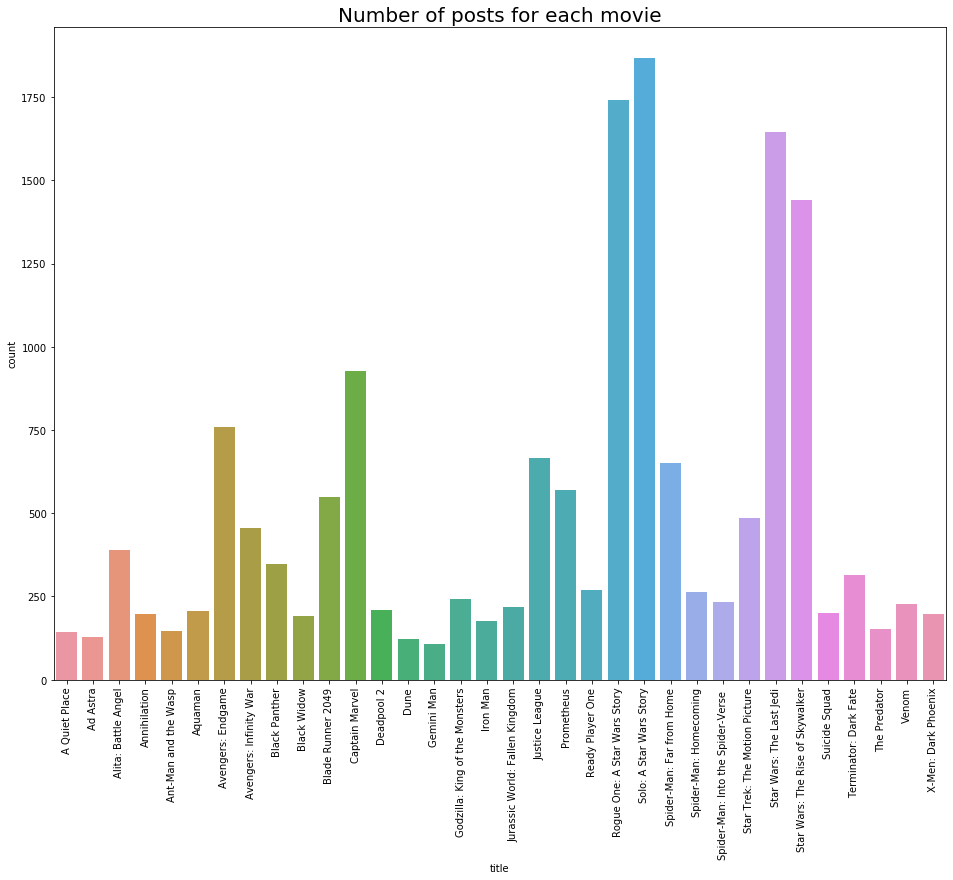

In [5]:
plt.figure(figsize=(16, 12))
sns.barplot(x='title', y='count', data=df_agg)
plt.title('Number of posts for each movie', fontdict={'fontsize':20})
plt.xticks(rotation=90)
plt.show()

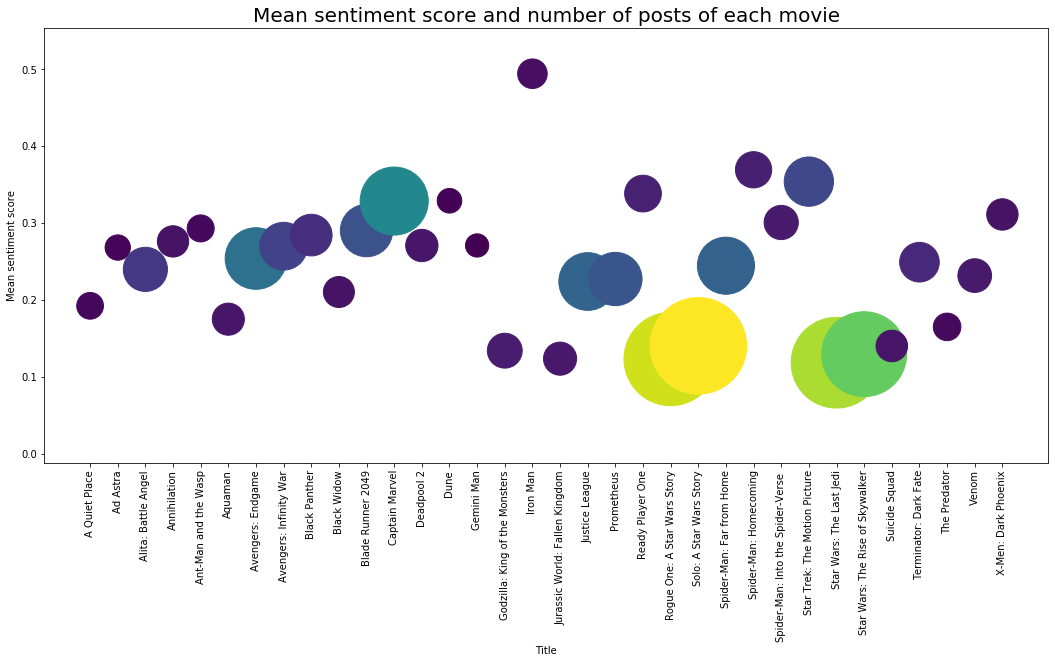

In [6]:
plt.figure(figsize=(18, 8))
plt.scatter(x=df_agg.index, y=df_agg['sent_mean'], s=5*df_agg['count'], c=df_agg['count'])
plt.title('Mean sentiment score and number of posts of each movie', fontdict={'fontsize':20})
plt.xlabel('Title')
plt.ylabel('Mean sentiment score')
plt.xticks(df_agg.index, labels=df_agg['title'], rotation=90)
plt.show()

# Some movies of some famous directors

In [7]:
directors_movies = [
    {'thread':'the-irishman-2019.358367', 'title':'The Irishman', 'director':'Martin Scorsese'},
    {'thread':'ready-player-one-2018.339700', 'title':'Ready Player One', 'director':'Steven Spielberg'},
    {'thread':'schindlers-list-1993-25th-anniversary-re-release.358757', 'title':"Schindler's List", 'director':'Steven Spielberg'},
    {'thread':'star-wars-episode-i-the-phantom-menace-1999.330924', 'title':'Star Wars: Episode I - The Phantom Menace', 'director':'George Lucas'},
    {'thread':'star-wars-episode-ii-attack-of-the-clones-2002.60765', 'title':'Star Wars: Episode II - Attack of the Clones', 'director':'George Lucas'},
    {'thread':'star-wars-episode-iii-revenge-of-the-sith-2005.211960', 'title':'Star Wars: Episode III - Revenge of the Sith', 'director':'George Lucas'},
    {'thread':'apocalypse-now-1979.361303', 'title':'Apocalypse Now', 'director':'Francis Ford Coppola'},
    {'thread':'once-upon-a-time-in-hollywood-2019.354993', 'title':'Once Upon a Time in Hollywood', 'director':'Quentin Tarantino'},
    {'thread':'the-hateful-eight-2015.342480', 'title':'he Hateful Eight', 'director':'Quentin Tarantino'},
    {'thread':'prometheus-2012.310242', 'title':'Prometheus', 'director':'Ridley Scott'},
    {'thread':'solo-a-star-wars-story-2018.357757', 'title':'Solo: A Star Wars Story', 'director':'Ron Howard'},
    {'thread':'the-shape-of-water-2017-review-and-discussion.352203', 'title':'The Shape of Water', 'director':'Guillermo del Toro'}
]


In [107]:
for movie in directors_movies:
    fetch_articles(thread_name=movie['thread'], movie_title=movie['title'], movie_director=movie['director'], max_pages=100)

Fetching: https://www.hometheaterforum.com/community/threads/apocalypse-now-1979.361303
Fetching: https://www.hometheaterforum.com/community/threads/apocalypse-now-1979.361303/page-2
Fetching: https://www.hometheaterforum.com/community/threads/apocalypse-now-1979.361303/page-3
Fetching: https://www.hometheaterforum.com/community/threads/apocalypse-now-1979.361303/page-4
Fetching: https://www.hometheaterforum.com/community/threads/apocalypse-now-1979.361303/page-5
Fetching: https://www.hometheaterforum.com/community/threads/apocalypse-now-1979.361303/page-6
Finished.
Fetching: https://www.hometheaterforum.com/community/threads/once-upon-a-time-in-hollywood-2019.354993
Fetching: https://www.hometheaterforum.com/community/threads/once-upon-a-time-in-hollywood-2019.354993/page-2
Fetching: https://www.hometheaterforum.com/community/threads/once-upon-a-time-in-hollywood-2019.354993/page-3
Fetching: https://www.hometheaterforum.com/community/threads/once-upon-a-time-in-hollywood-2019.354993/p

Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-6
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-7
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-8
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-9
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-10
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-11
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-12
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-13
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-14
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-

Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-85
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-86
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-87
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-88
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-89
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-90
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-91
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-92
Fetching: https://www.hometheaterforum.com/community/threads/solo-a-star-wars-story-2018.357757/page-93
Fetching: https://www.hometheaterforum.com/community/threads/sol

In [8]:
df_movies = build_dataframe(directors_movies)

df_agg = df_movies.groupby(by=['movie_title', 'movie_director'])
df_agg = df_agg.agg({'sent_compound':['count', 'mean']})
df_agg = df_agg.reset_index()
df_agg.columns = ['title', 'director', 'count', 'sent_mean']
directors = list(df_agg['director'].unique())
df_agg['director_code'] = df_agg['director'].apply(lambda x: directors.index(x))

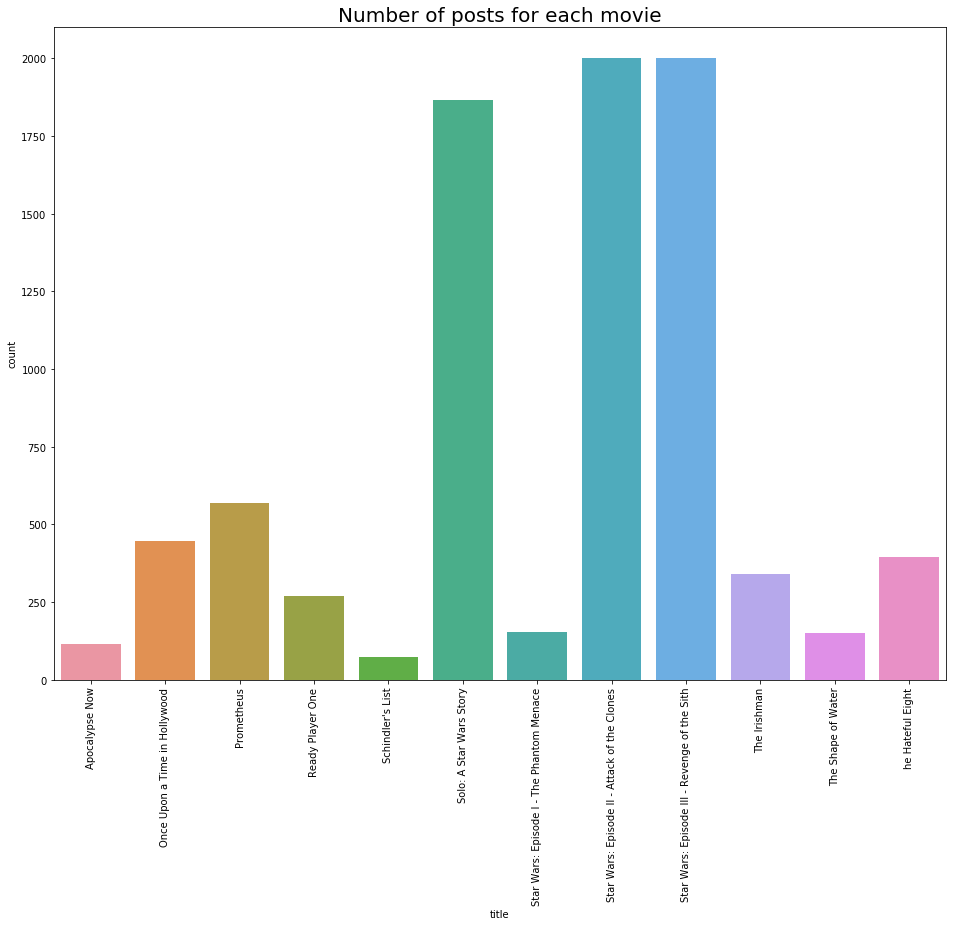

In [9]:
plt.figure(figsize=(16, 12))
sns.barplot(x='title', y='count', data=df_agg)
plt.title('Number of posts for each movie', fontdict={'fontsize':20})
plt.xticks(rotation=90)
plt.show()

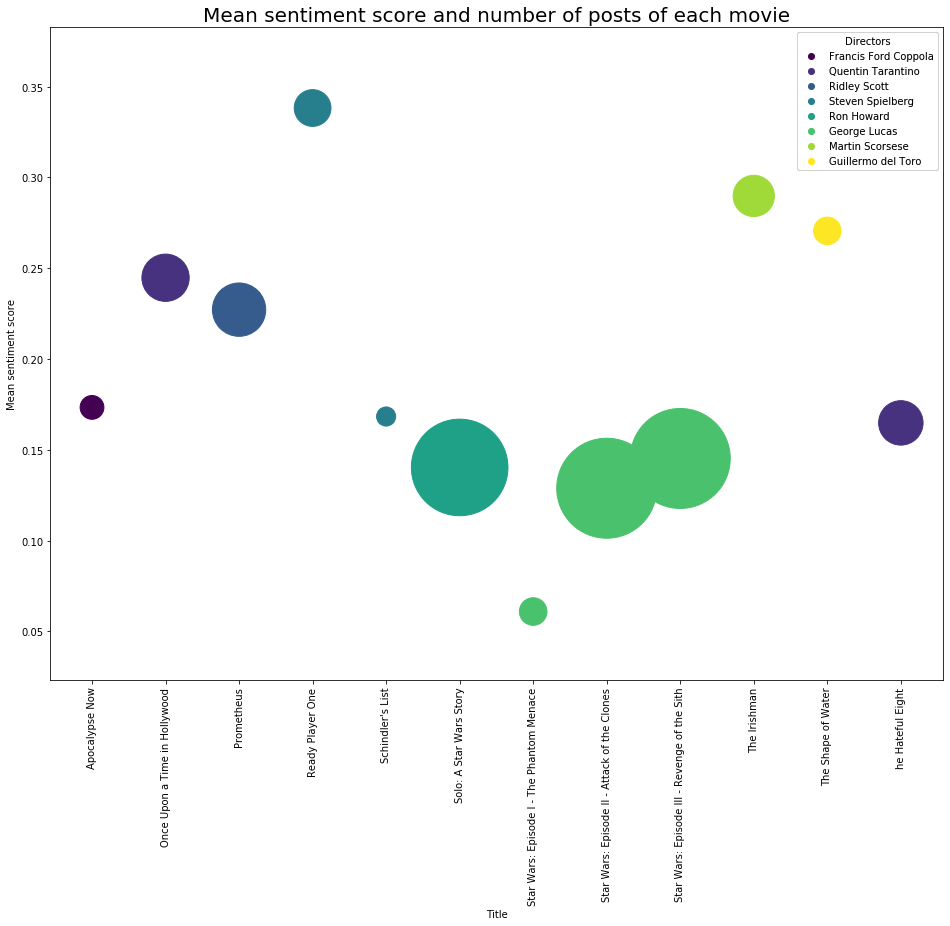

In [10]:
fig, ax = plt.subplots(figsize=(16, 12))
scatter = plt.scatter(x=df_agg.index, y=df_agg['sent_mean'], s=5*df_agg['count'], c=df_agg['director_code'])
plt.title('Mean sentiment score and number of posts of each movie', fontdict={'fontsize':20})
plt.xlabel('Title')
plt.ylabel('Mean sentiment score')
plt.xticks(df_agg.index, labels=df_agg['title'], rotation=90)
leg_elements = list(scatter.legend_elements())
leg_elements[1] = directors
leg_elements = tuple(leg_elements)
legend1 = ax.legend(*leg_elements, title="Directors")
ax.add_artist(legend1)
plt.show()